
#INSTALLING REQUIRED LIBRARIES

In [5]:
pip install tensorflow

# ACCESSING DATASET FROM THE DRIVE

## MOUNTING DRIVE

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##LOCATING THE DIRECTORY

In [2]:
import os

# List files in a specific folder
folder_path = '/content/drive/My Drive/ALL_IDB1'
files = os.listdir(folder_path)
for file in files:
    print(file)

readme_ALL_IDB1.txt
xyc
im


##LOADING THE DATASET

In [3]:
import shutil
# Copy a folder from Google Drive to Colab environment
shutil.copytree('/content/drive/My Drive/ALL_IDB1/im', '/content/dataset')

'/content/dataset'

# CALCULATING THE PERCENTAGE OF CANCER CELLS

Total number of pixels in the image: 2342016
Number of pixels occupied by purple cells: 233905
Number of pixels occupied by red-like cells: 109912
Percentage of pixels occupied by purple cells: 9.99%
Percentage of pixels occupied by red-like cells: 4.69%


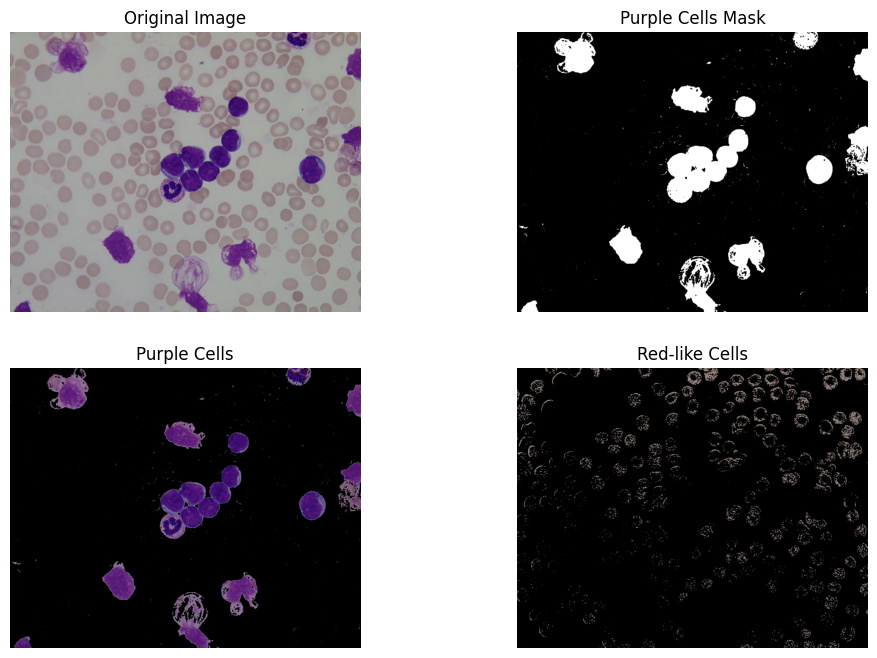

In [10]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/dataset/Im001_1.jpg'
image = cv2.imread(image_path)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define HSV range for purple color
lower_purple = np.array([120, 40, 40])
upper_purple = np.array([160, 255, 255])

# Create a mask for the purple cells
mask_purple = cv2.inRange(image_hsv, lower_purple, upper_purple)
purple_cells = cv2.bitwise_and(image, image, mask=mask_purple)

# Count the number of pixels occupied by purple cells
purple_pixel_count = cv2.countNonZero(mask_purple)

# Define HSV range for red-like color (adjust based on visual inspection of the image)
lower_red = np.array([0, 30, 70])
upper_red = np.array([20, 255, 255])

# Create a mask for the red-like cells
mask_red = cv2.inRange(image_hsv, lower_red, upper_red)
red_cells = cv2.bitwise_and(image, image, mask=mask_red)

# Count the number of pixels occupied by red-like cells
red_pixel_count = cv2.countNonZero(mask_red)

# Calculate the total number of pixels in the image
total_pixel_count = image.shape[0] * image.shape[1]

# Calculate the percentage of pixels occupied by purple cells
percentage_purple = (purple_pixel_count / total_pixel_count) * 100

# Calculate the percentage of pixels occupied by red-like cells
percentage_red = (red_pixel_count / total_pixel_count) * 100

# Display results
print(f'Total number of pixels in the image: {total_pixel_count}')
print(f'Number of pixels occupied by purple cells: {purple_pixel_count}')
print(f'Number of pixels occupied by red-like cells: {red_pixel_count}')
print(f'Percentage of pixels occupied by purple cells: {percentage_purple:.2f}%')
print(f'Percentage of pixels occupied by red-like cells: {percentage_red:.2f}%')

# Display the masks and the original image
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask_purple, cmap='gray')
plt.title('Purple Cells Mask')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.cvtColor(purple_cells, cv2.COLOR_BGR2RGB))
plt.title('Purple Cells')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(cv2.cvtColor(red_cells, cv2.COLOR_BGR2RGB))
plt.title('Red-like Cells')
plt.axis('off')

plt.show()
